In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os 
import cv2 
from PIL import Image 

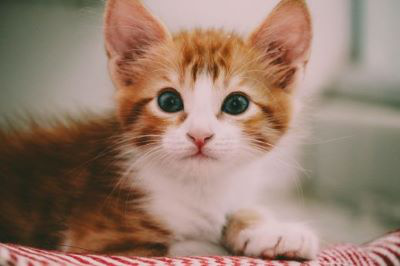

In [ ]:
image=Image.open('/content/sample_data/image1.jpg')
image

In [ ]:
cv2.imread('/content/sample_data/image1.jpg')

array([[[ 39,  52,  44],
        [ 39,  52,  44],
        [ 40,  53,  45],
        ...,
        [158, 163, 164],
        [158, 163, 164],
        [157, 162, 163]],

       [[ 40,  53,  45],
        [ 40,  53,  45],
        [ 41,  54,  46],
        ...,
        [158, 163, 164],
        [158, 163, 164],
        [158, 163, 164]],

       [[ 41,  54,  46],
        [ 42,  55,  47],
        [ 42,  55,  47],
        ...,
        [158, 163, 164],
        [158, 163, 164],
        [158, 163, 164]],

       ...,

       [[116, 131, 150],
        [122, 137, 156],
        [127, 141, 163],
        ...,
        [158, 165, 190],
        [144, 151, 176],
        [122, 129, 154]],

       [[ 93, 107, 125],
        [102, 116, 135],
        [111, 125, 147],
        ...,
        [154, 161, 186],
        [150, 155, 180],
        [137, 143, 166]],

       [[ 69,  83, 101],
        [ 80,  94, 112],
        [ 92, 106, 128],
        ...,
        [146, 153, 178],
        [148, 152, 176],
        [137, 141, 165]]

In [ ]:
train=ImageDataGenerator(featurewise_center=True,rotation_range=0.4,width_shift_range=0.3,horizontal_flip=True,shear_range=0.3,rescale=1/255)
test=ImageDataGenerator(featurewise_center=True,rotation_range=0.4,width_shift_range=0.3,horizontal_flip=True,shear_range=0.3,rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/ImageDataSet/train/',batch_size=3,target_size=(200,200),class_mode='binary') 
valid_dataset=test.flow_from_directory('/content/drive/MyDrive/ImageDataSet/test/',batch_size=3,target_size=(200,200),class_mode='binary')
train_dataset.class_indices

Found 40 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


{'cats': 0, 'dogs': 1}

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Flatten(), 

                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')                                 

                                  ])

#         Training the Model

In [57]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,epochs=20,steps_per_epoch=7,validation_data=valid_dataset)

Epoch 1/20
7/7 [==============================] - 5s 554ms/step - loss: 6.4472e-05 - accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 5s 720ms/step - loss: 6.5910e-04 - accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 4s 566ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 5s 702ms/step - loss: 1.6674e-10 - accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 4s 585ms/step - loss: 5.3504e-07 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 4s 587ms/step - loss: 4.7845e-05 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 4s 545ms/step - loss: 1.5594e-04 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 4s 586ms/step - loss: 0.0743 - accuracy: 0.9524
Epoch 9/20
7/7 [==============================] - 4s 560ms/step - loss: 7.8157e-11 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 4s 513ms/step - loss: 0.2426 - accuracy

#Test the Model

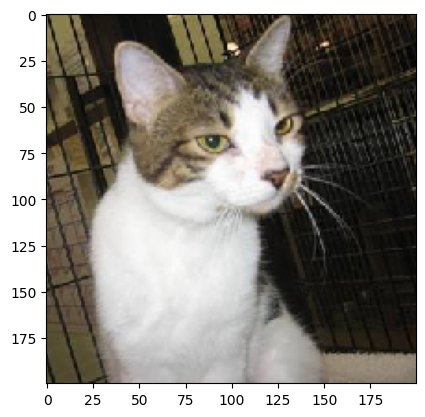

1/1 [==============================] - 0s 62ms/step
It's a CAT


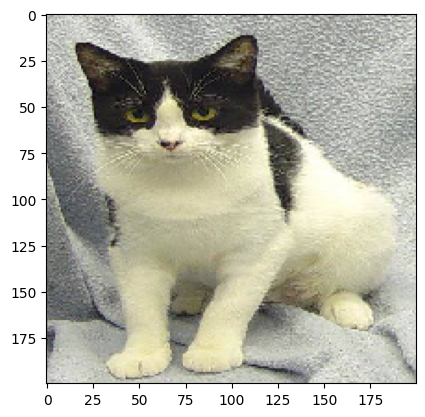

1/1 [==============================] - 0s 44ms/step
It's a CAT


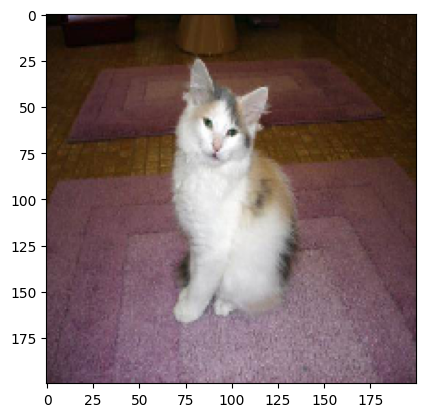

1/1 [==============================] - 0s 43ms/step
It's a CAT


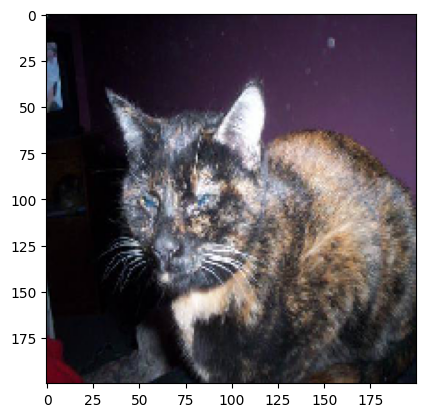

1/1 [==============================] - 0s 43ms/step
It's a CAT


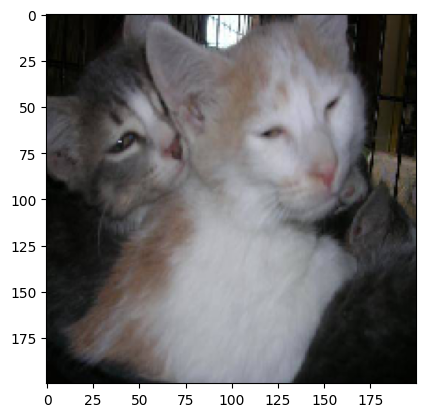

1/1 [==============================] - 0s 48ms/step
It's a CAT


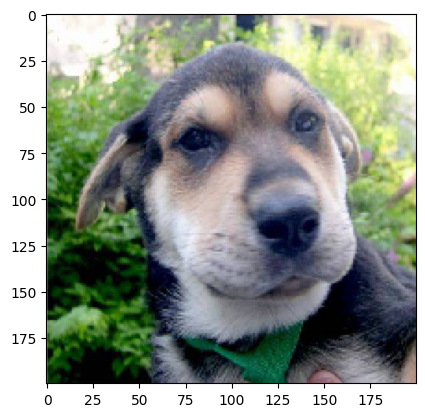

1/1 [==============================] - 0s 43ms/step
It's a DOG


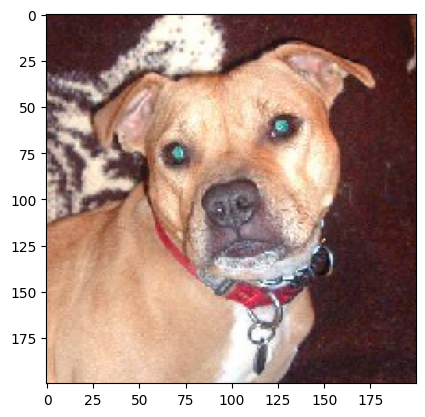

1/1 [==============================] - 0s 43ms/step
It's a DOG


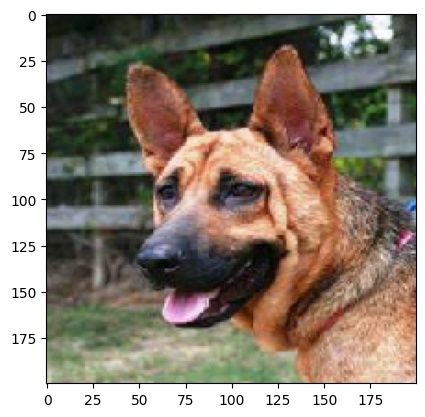

1/1 [==============================] - 0s 51ms/step
It's a DOG


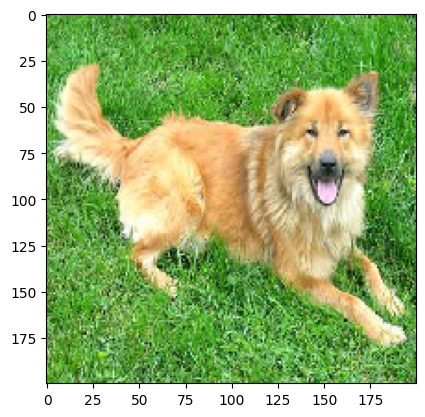

1/1 [==============================] - 0s 58ms/step
It's a DOG


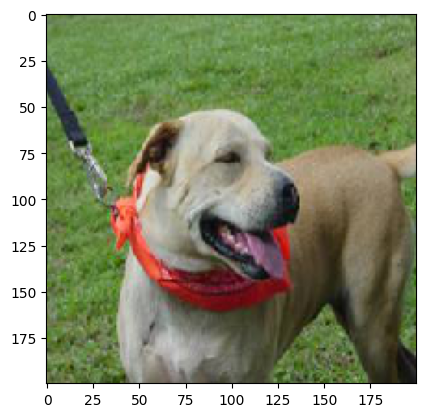

1/1 [==============================] - 0s 79ms/step
It's a DOG


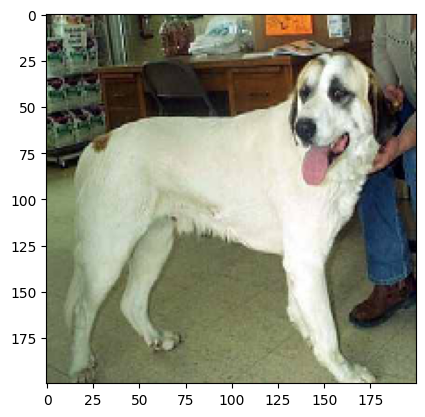

1/1 [==============================] - 0s 52ms/step
It's a DOG


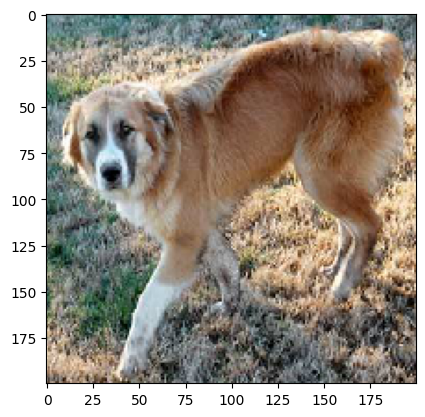

1/1 [==============================] - 0s 54ms/step
It's a DOG


In [60]:
from tensorflow.keras.preprocessing import image
dir_path='/content/drive/MyDrive/ImageDataSet/test/'
for i in os.listdir(dir_path):
  im1=image.load_img(dir_path+'//'+i,target_size=(200,200)) 
  plt.imshow(im1) 
  plt.show()    
  im1=image.img_to_array(im1) 
  im1=np.expand_dims(im1,axis=0) 
  y=np.vstack([im1]) 
  y_pr=model.predict(y) 
  if y_pr==0:
    print('It\'s a CAT')
  else:
    print('It\'s a DOG')